# Burnout en empleados corporativos
## Aprendizaje de Máquina - TP FINAL

Este conjunto de datos fue creado como parte de un estudio de investigación destinado a comprender los factores que contribuyen al agotamiento laboral (*burnout*) de los empleados en entornos corporativos. Los datos fueron recolectados mediante encuestas estructuradas y estudios observacionales realizados en empresas con sede en Bengaluru, India. Se enfoca en una variedad de indicadores relacionados con el bienestar laboral y personal, tales como el equilibrio entre la vida laboral y personal, el apoyo del gerente, los patrones de sueño, la carga de trabajo y el reconocimiento. El conjunto de datos ofrece una visión integral de variables comúnmente asociadas con el estrés y el agotamiento de los empleados, brindando información valiosa para el análisis organizacional y el diseño de estrategias de intervención. *(14-04-2018)*

**Fuente del dataset:**  
Shankar, Kunal, 2018, *"Employee Burnout Analysis"*, Harvard Dataverse, [https://doi.org/10.7910/DVN/VG6KQD](https://doi.org/10.7910/DVN/VG6KQD)  


### Carga de datos y visualización rápida

In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [155]:
sns.set_palette("pastel")

#### 1. Cargar datos desde un archivo CSV a un df de Pandas

In [156]:
df_csv = pd.read_csv("data/enriched_employee_dataset.csv")

In [110]:
df_csv.head() 

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Years in Company,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16,16,35,7.5,3,3,1,16,2
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36,16,41,7.1,5,3,3,10,5
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49,16,53,5.7,2,3,5,17,0
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20,16,43,6.7,3,3,1,13,2
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52,16,51,5.2,1,3,4,18,0


In [157]:
df_csv.tail(6) # Mostrar las últimas 6 filas

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Years in Company,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency
22744,fffe32003500370033003200,2008-05-27,Male,Product,No,3,7.0,6.2,0.54,16,56,5.8,1,3,4,17,1
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41,16,58,5.3,1,3,4,5,0
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59,16,50,5.8,2,2,5,3,1
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72,16,50,5.2,1,2,4,15,0
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52,16,59,5.8,2,3,4,8,0
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61,17,53,5.4,2,2,4,17,0


In [158]:
df_csv.shape

(22750, 17)

In [159]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Employee ID              22750 non-null  object 
 1   Date of Joining          22750 non-null  object 
 2   Gender                   22750 non-null  object 
 3   Company Type             22750 non-null  object 
 4   WFH Setup Available      22750 non-null  object 
 5   Designation              22750 non-null  int64  
 6   Resource Allocation      21369 non-null  float64
 7   Mental Fatigue Score     20633 non-null  float64
 8   Burn Rate                21626 non-null  float64
 9   Years in Company         22750 non-null  int64  
 10  Work Hours per Week      22750 non-null  int64  
 11  Sleep Hours              22750 non-null  float64
 12  Work-Life Balance Score  22750 non-null  int64  
 13  Manager Support Score    22750 non-null  int64  
 14  Deadline Pressure Scor

In [160]:
df_csv.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Years in Company,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency
count,22750.000000,21369.000000,20633.000000,21626.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000
mean,2.178725,4.481398,5.728188,0.452005,16.015956,47.364747,6.153965,2.595604,2.874681,3.400132,11.058022,1.819473
std,1.135145,2.047211,1.920839,0.198226,0.125308,7.651106,0.892709,1.402847,1.281129,1.409178,4.907718,1.713508
min,0.000000,1.000000,0.000000,0.000000,16.000000,35.000000,3.400000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000,16.000000,40.000000,5.400000,1.000000,2.000000,2.000000,7.000000,0.000000
50%,2.000000,4.000000,5.900000,0.450000,16.000000,49.000000,6.000000,2.000000,3.000000,4.000000,11.000000,1.000000
75%,3.000000,6.000000,7.100000,0.590000,16.000000,54.000000,6.900000,4.000000,4.000000,5.000000,15.000000,3.000000
max,5.000000,10.000000,10.000000,1.000000,17.000000,59.000000,9.100000,5.000000,5.000000,5.000000,19.000000,5.000000


In [161]:
cols_analizar = ['Gender', 'Company Type', 'WFH Setup Available', 'Designation', 'Resource Allocation', 'Years in Company', 'Work-Life Balance Score', 'Manager Support Score', 'Deadline Pressure Score', 'Team Size', 'Recognition Frequency']  

for col in cols_analizar:
    print(f"\nValores únicos en {col}: {df_csv[col].unique()}")


Valores únicos en Gender: ['Female' 'Male']

Valores únicos en Company Type: ['Service' 'Product']

Valores únicos en WFH Setup Available: ['No' 'Yes']

Valores únicos en Designation: [2 1 3 0 4 5]

Valores únicos en Resource Allocation: [ 3.  2. nan  1.  7.  4.  6.  5.  8. 10.  9.]

Valores únicos en Years in Company: [16 17]

Valores únicos en Work-Life Balance Score: [3 5 2 1 4]

Valores únicos en Manager Support Score: [3 4 5 2 1]

Valores únicos en Deadline Pressure Score: [1 3 5 4 2]

Valores únicos en Team Size: [16 10 17 13 18  9 14 12  8 19  3  7 15  4 11  6  5]

Valores únicos en Recognition Frequency: [2 5 0 1 4 3]


**Análisis preliminar de las variables del dataset**

| Variable                | Descripción                                                   | Tipo de dato                                             | Acción posible                       |
|-------------------------|---------------------------------------------------------------|----------------------------------------------------------|--------------------------------------|
| Employee ID             | Código de identificación del empleado                         | Categórica - Nominal                                     | Evaluar quitar del dataset           |
| Date of Joining         | Fecha de inicio                                               | Fecha (Categórica/Numérica según el uso)                 | Convertir a formato fecha / Quitar del dataset (mismo motivo que years in company)            | 
| Gender                  | Género (F/M)                                                  | Categórica - Nominal (Binaria)                           | Convertir a categórica               |
| Company Type            | Tipo de compañía (Productos/Servicios)                        | Categórica - Nominal (Binaria)                           | Convertir a categórica               |
| WFH Setup Available     | Posibilidad de trabajo remoto (*Work From Home*) (Sí/No)      | Categórica - Nominal (Binaria)                           | Convertir a categórica               |
| Designation             | Designación - Nivel jerárquico (0 a 5)                        | Categórica - Ordinal (Representación numérica discreta)  |                                      |
| Resource Allocation     | Recursos bajo su responsabilidad (1 a 10)        | Categórica - Ordinal (Representación numérica discreta)  | Estrategia para valores nulos  |
| Mental Fatigue Score    | Nivel de fatiga mental (0 a 10)                               | Numérica continua                                        | Estrategia para valores nulos                                     |
| Burn Rate               | Tasa de agotamiento (valores entre 0 y 1)                     | Numérica continua                                        | Definir como output (y)              |
| Years in Company        | Años en la empresa (16 o 17)                                  | Numérica discreta                                        | Evaluar quitar del dataset           |
| Work Hours per Week     | Horas de trabajo por semana (entre 35 y 59)                   | Numérica discreta                                        |                                      |
| Sleep Hours             | Horas de sueño (entre 3.4 y 9.1)                              | Numérica continua                                        |                                      |
| Work-Life Balance Score | Nivel de equilibrio trabajo-vida personal (1 a 5)             | Categórica - Ordinal (Representación numérica discreta)  |                                      |
| Manager Support Score   | Nivel de apoyo de la organización (1 a 5)                     | Categórica - Ordinal (Representación numérica discreta)  |                                      |
| Deadline Pressure Score | Nivel de presión con deadlines (1 a 5)                        | Categórica - Ordinal (Representación numérica discreta)  |                                      |
| Team Size               | Cantidad de personas en el equipo (valores entre 3 y 19)      | Numérica discreta                                        |                                      |
| Recognition Frequency   | Frecuencia de reconocimiento (0 a 5)                          | Categórica - Ordinal (Representación numérica discreta)  |                                      |


### 2. Dividir set en train y test

In [162]:
# Antes de dividir el dataset, verificamos si hay valores nulos que afecten el target
print(f"Valores faltantes: {df_csv.isnull().sum()}")  # Calcular valores faltantes


Valores faltantes: Employee ID                   0
Date of Joining               0
Gender                        0
Company Type                  0
WFH Setup Available           0
Designation                   0
Resource Allocation        1381
Mental Fatigue Score       2117
Burn Rate                  1124
Years in Company              0
Work Hours per Week           0
Sleep Hours                   0
Work-Life Balance Score       0
Manager Support Score         0
Deadline Pressure Score       0
Team Size                     0
Recognition Frequency         0
dtype: int64


In [163]:
# Eliminar nulos de burn rate
df_csv = df_csv.dropna(subset=['Burn Rate'])
# Verificar si hay valores nulos después de la eliminación
print(f"Valores faltantes después de eliminar nulos: {df_csv.isnull().sum()}")

Valores faltantes después de eliminar nulos: Employee ID                   0
Date of Joining               0
Gender                        0
Company Type                  0
WFH Setup Available           0
Designation                   0
Resource Allocation        1278
Mental Fatigue Score       1945
Burn Rate                     0
Years in Company              0
Work Hours per Week           0
Sleep Hours                   0
Work-Life Balance Score       0
Manager Support Score         0
Deadline Pressure Score       0
Team Size                     0
Recognition Frequency         0
dtype: int64


In [164]:
from sklearn.model_selection import train_test_split
# Separar en features (X) y target (Burn Rate)
X = df_csv.drop(columns=["Burn Rate"])
y = df_csv["Burn Rate"]

# dividir train/test 
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


### 3. Limpieza de datos

#### 3.1 Limpieza de datos: valores nulos

In [165]:
#### 2.1 Revisar datos faltantes y duplicados
print(f"Valores faltantes: {X_train.isnull().sum()}")  # Calcular valores faltantes
print(f"Valores faltantes: {X_test.isnull().sum()}")  # Calcular valores faltantes para el test set


Valores faltantes: Employee ID                   0
Date of Joining               0
Gender                        0
Company Type                  0
WFH Setup Available           0
Designation                   0
Resource Allocation        1015
Mental Fatigue Score       1563
Years in Company              0
Work Hours per Week           0
Sleep Hours                   0
Work-Life Balance Score       0
Manager Support Score         0
Deadline Pressure Score       0
Team Size                     0
Recognition Frequency         0
dtype: int64
Valores faltantes: Employee ID                  0
Date of Joining              0
Gender                       0
Company Type                 0
WFH Setup Available          0
Designation                  0
Resource Allocation        263
Mental Fatigue Score       382
Years in Company             0
Work Hours per Week          0
Sleep Hours                  0
Work-Life Balance Score      0
Manager Support Score        0
Deadline Pressure Score      0
Tea

<Axes: >

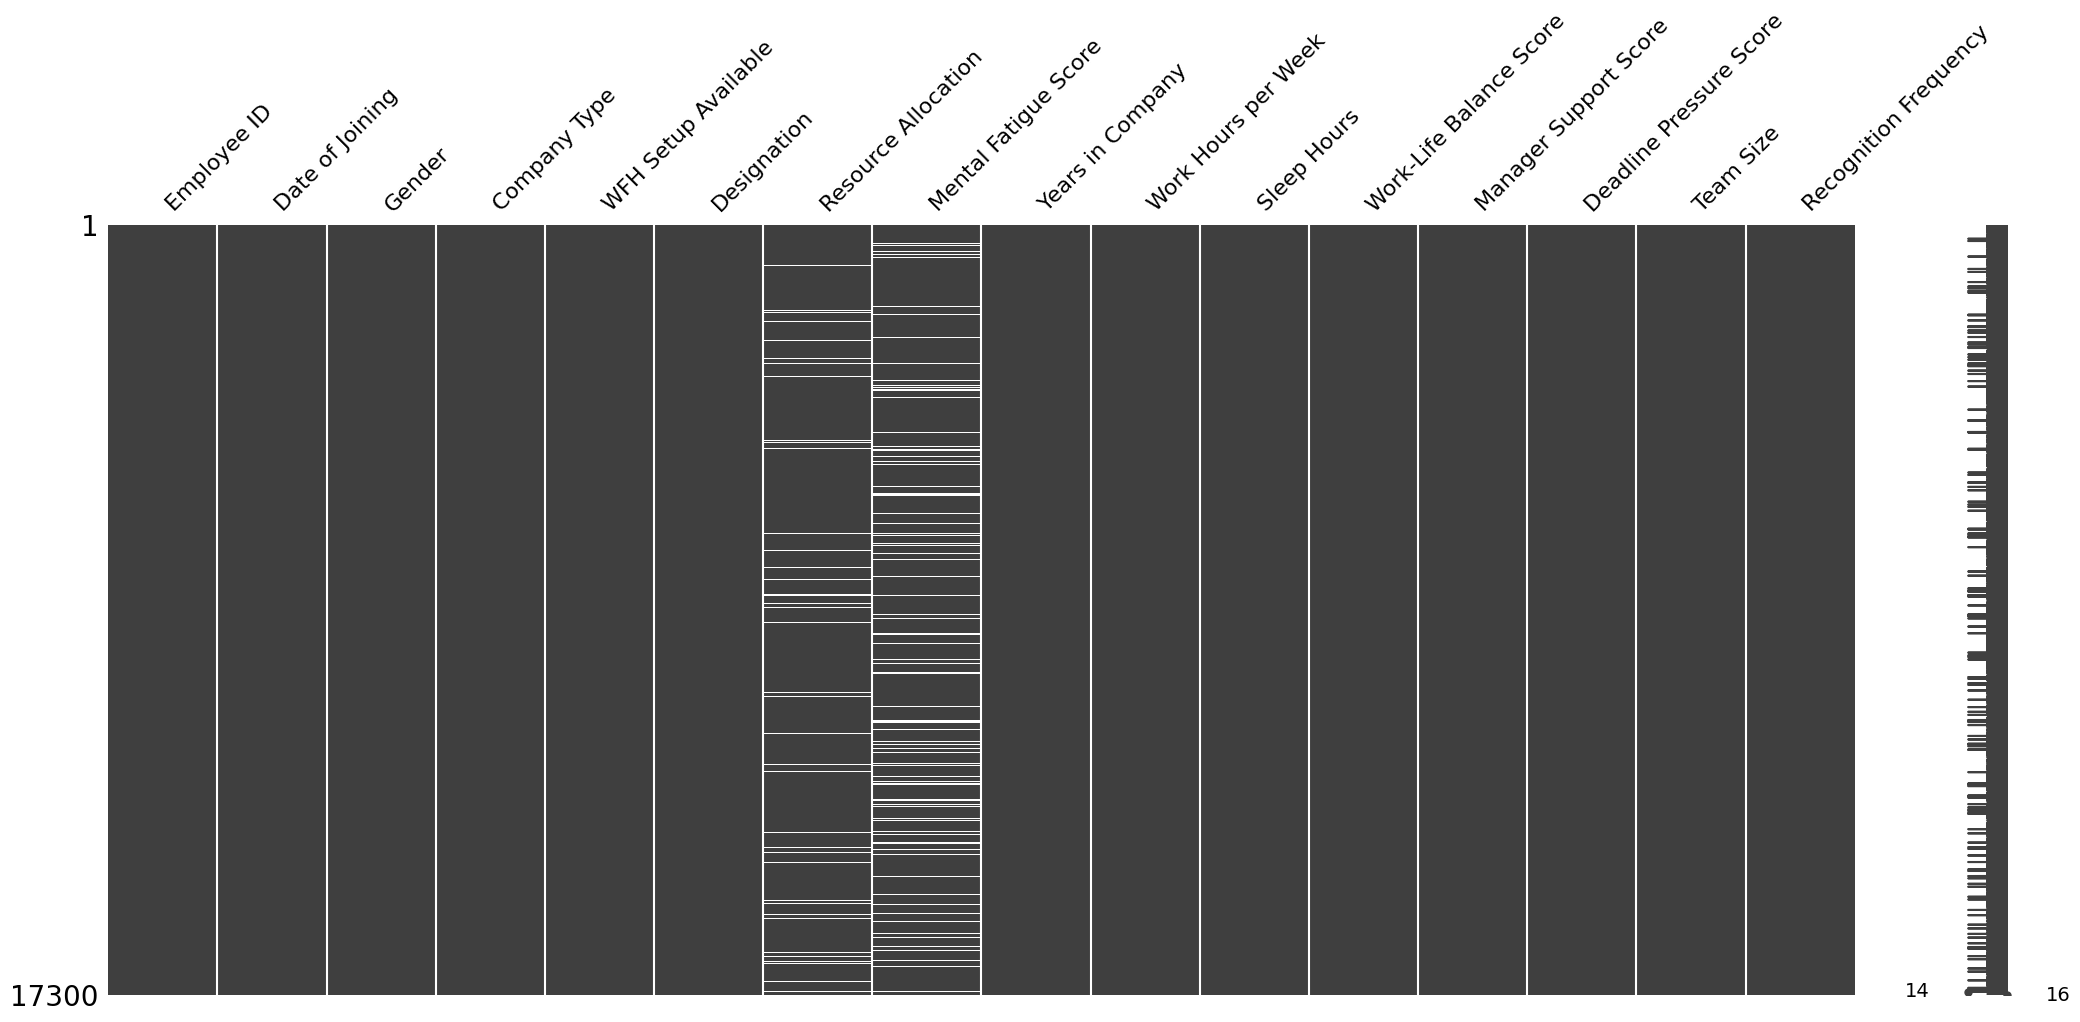

In [166]:
# Visualización de valores faltantes
import missingno as msno
msno.matrix(X_train)

In [167]:
# Ver cuántas filas tienen al menos dos nulos
print("Filas con al menos dos nulos en train:", X_train.isna().sum(axis=1).gt(1).sum())
print("Filas con al menos dos nulos en test:", X_test.isna().sum(axis=1).gt(1).sum())


Filas con al menos dos nulos en train: 148
Filas con al menos dos nulos en test: 39


1. **Más de un nulo:** Se eliminan las observaciones que tengan más de un valor nulo, ya que no representan un alto porcentaje del total y podrían ser datos erróneos o haber distintas razones por las que la persona eligió no responder.

In [168]:
# Eliminar filas con dos nulos
train_df_limpio = X_train.dropna(thresh=len(X_train.columns) - 1)
test_df_limpio = X_test.dropna(thresh=len(X_test.columns) - 1)

In [169]:
# Comparar antes y después para train y test
nulls_before_train = X_train[['Resource Allocation', 'Mental Fatigue Score']].isnull().sum()
nulls_after_train = train_df_limpio[['Resource Allocation', 'Mental Fatigue Score']].isnull().sum()

nulls_before_test = X_test[['Resource Allocation', 'Mental Fatigue Score']].isnull().sum()
nulls_after_test = test_df_limpio[['Resource Allocation', 'Mental Fatigue Score']].isnull().sum()

print("Train set:")
print("Valores nulos antes de limpiar:\n", nulls_before_train)
print("Valores nulos después de limpiar:\n", nulls_after_train)

print("\nTest set:")
print("Valores nulos antes de limpiar:\n", nulls_before_test) 
print("Valores nulos después de limpiar:\n", nulls_after_test)

Train set:
Valores nulos antes de limpiar:
 Resource Allocation     1015
Mental Fatigue Score    1563
dtype: int64
Valores nulos después de limpiar:
 Resource Allocation      867
Mental Fatigue Score    1415
dtype: int64

Test set:
Valores nulos antes de limpiar:
 Resource Allocation     263
Mental Fatigue Score    382
dtype: int64
Valores nulos después de limpiar:
 Resource Allocation     224
Mental Fatigue Score    343
dtype: int64


2. **Resource Allocation**   Se analiza la relación entre Resource Allocation y otras variables, para evaluar cuál sería la mejor estrategia para los valores nulos.

In [170]:
# Se analiza si hay algún valor de las otras variables que se mantenga constante para los nulos de 'Resource Allocation'
nulos_ra = train_df_limpio[train_df_limpio['Resource Allocation'].isnull()]
nulos_ra = nulos_ra.drop(columns=['Employee ID', 'Date of Joining','Years in Company','Resource Allocation'])
nulos_ra.head(15)


,Gender,Company Type,WFH Setup Available,Designation,Mental Fatigue Score,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency
7593,Male,Product,Yes,2,5.2,37,8.0,3,3,3,4,3
5980,Female,Service,Yes,1,6.2,48,5.0,2,3,4,9,0
10159,Male,Service,Yes,1,5.8,57,4.7,2,2,5,12,1
2862,Female,Service,No,2,7.0,51,6.3,2,1,4,5,0
1745,Male,Service,No,4,10.0,58,4.9,1,3,4,4,0
6453,Male,Service,No,2,5.7,56,5.1,2,2,4,16,1
129,Female,Product,Yes,4,8.9,53,5.1,1,3,5,3,1
2052,Female,Product,No,4,6.2,59,4.8,2,3,4,14,1
12698,Male,Service,No,2,7.1,51,5.2,2,3,5,6,0
9262,Male,Product,No,1,7.5,49,5.1,2,2,4,12,1


3. **Mental Fatigue Score:** Se analiza la relación entre Mental Fatigue Score y otras variables, para evaluar cuál sería la mejor estrategia para los valores nulos.

In [171]:
nulos_mfs = train_df_limpio[train_df_limpio['Mental Fatigue Score'].isnull()]
nulos_mfs = nulos_mfs.drop(columns=['Employee ID', 'Date of Joining','Years in Company','Mental Fatigue Score'])
nulos_mfs.head(15)

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency
19505,Male,Service,No,1,3.0,41,6.9,5,3,1,5,2
22486,Female,Service,No,4,9.0,49,5.0,1,3,4,6,0
21239,Male,Service,No,1,3.0,37,6.8,3,5,2,5,5
218,Male,Service,Yes,4,8.0,50,5.1,1,1,4,8,1
1054,Female,Service,Yes,3,4.0,39,7.5,3,4,1,13,3
8264,Male,Product,Yes,3,5.0,58,5.6,1,2,5,19,1
11353,Female,Service,Yes,2,4.0,44,7.6,5,5,1,18,5
16071,Female,Service,Yes,1,3.0,36,6.8,4,4,1,12,2
7383,Female,Service,No,5,10.0,51,5.0,2,3,4,14,1
19273,Male,Product,No,3,5.0,57,5.9,2,3,5,6,1


**Análisis de histogramas de Resource Allocation y Mental Fatigue Score:** Se evalúa la distribución de los datos para 'Resource Allocation' y 'Mental Fatigue Score' para evaluar si se pueden imputar. 
- Mental Fatigue Score: se observa una distribución con un pico, por lo que en una primera instancia se propone imputar con una constante estadística (en este caso la mediana, en línea punteada azul). 
- Resource Allocation: se evalúa la correlación con otras variables para evaluar otras estrategias de imputación.

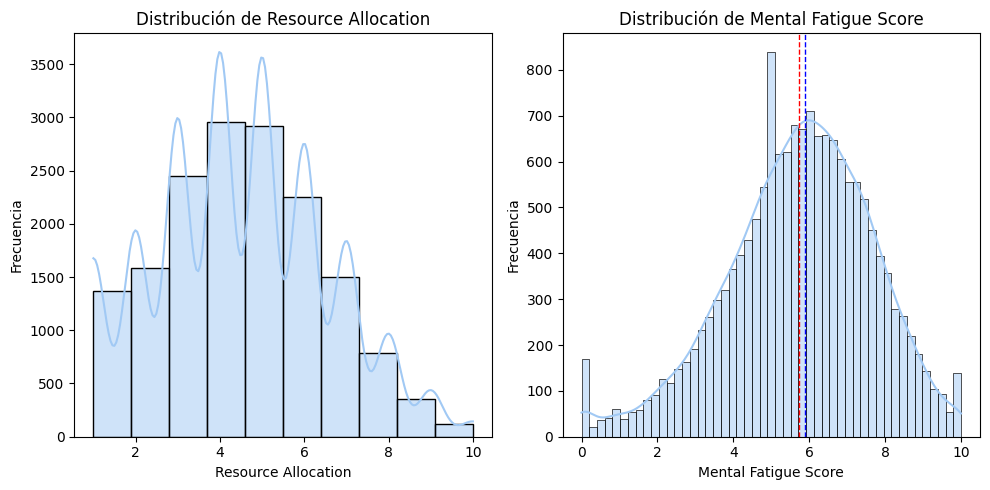

In [172]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(train_df_limpio['Resource Allocation'], bins=10, kde=True)
plt.title('Distribución de Resource Allocation')
plt.xlabel('Resource Allocation')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(train_df_limpio['Mental Fatigue Score'], bins='auto', kde=True)
plt.axvline(train_df_limpio['Mental Fatigue Score'].mean(), color='red', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(train_df_limpio['Mental Fatigue Score'].median(), color='blue', linestyle='dashed', linewidth=1, label='Mediana')
plt.title('Distribución de Mental Fatigue Score')
plt.xlabel('Mental Fatigue Score')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


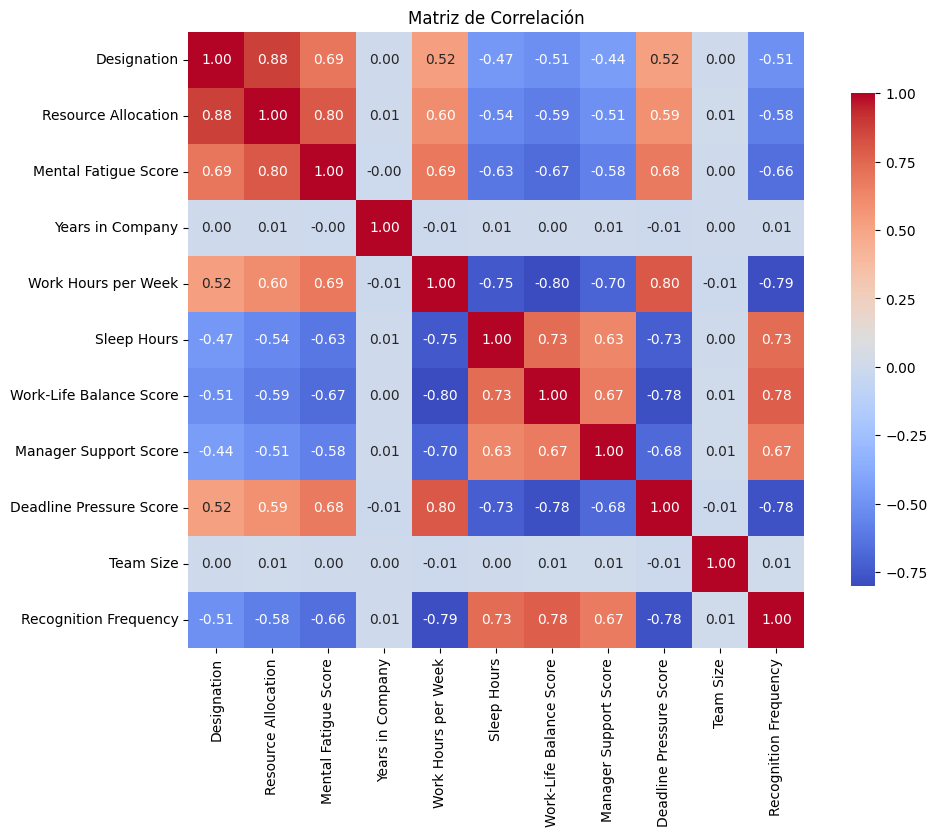

In [173]:
# Evaluar correlación entre 'Resource Allocation' y 'Mental Fatigue Score' y otras variables
# Obtener matriz de correlación
correlation_matrix = train_df_limpio.corr(numeric_only=True)
# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación')
plt.show()

Se decide imputar utilizando MICE ya que es un enfoque robusto para la imputación de valores faltantes  y permite modelar cada variable faltante como una funcion de las demas. 
La selección de variables a utilizar surge de la matriz de correlación, y se eligen las variables que tienen una alta correlación con las variables a ser imputadas

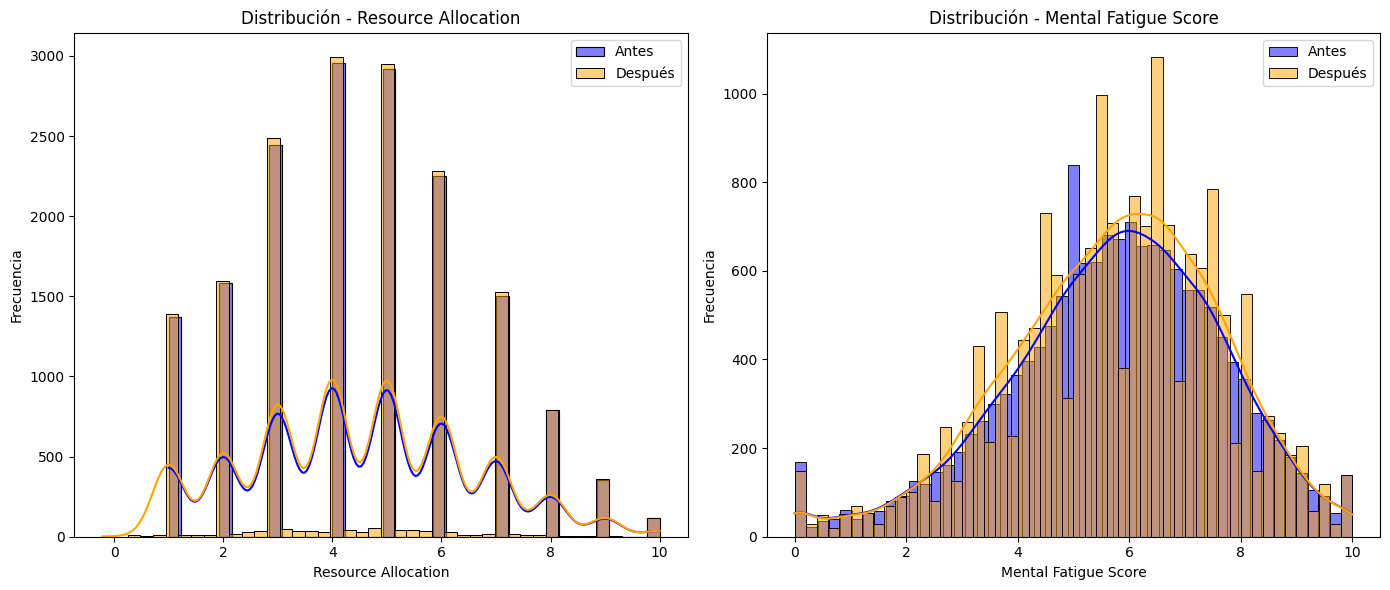

In [174]:
# =============================================
# IMPUTACIÓN CON MICE (IterativeImputer)
# =============================================

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Copias de trabajo
train_df_imputar = train_df_limpio.copy()
test_df_imputar = test_df_limpio.copy()

# Variables relevantes para imputar (sin usar 'Burn Rate')
variables_para_imputar = [
    'Designation', 'Resource Allocation', 'Mental Fatigue Score',
    'Work Hours per Week', 'Sleep Hours', 'Work-Life Balance Score',
    'Manager Support Score', 'Deadline Pressure Score', 'Team Size',
    'Recognition Frequency'
]

# Backup para comparar visualmente antes y después (solo para graficar)
ra_antes = train_df_imputar["Resource Allocation"].copy()
mfs_antes = train_df_imputar["Mental Fatigue Score"].copy()

# ========================
# 1. Ajustar imputador SOLO con train
# ========================
imputer = IterativeImputer(max_iter=10, random_state=42)
train_imputed_array = imputer.fit_transform(train_df_imputar[variables_para_imputar])

# Restaurar los datos imputados en el DataFrame
train_df_imputar[variables_para_imputar] = pd.DataFrame(
    train_imputed_array,
    columns=variables_para_imputar,
    index=train_df_imputar.index
)

# ========================
# 2. Aplicar al test set
# ========================
test_imputed_array = imputer.transform(test_df_imputar[variables_para_imputar])

test_df_imputar[variables_para_imputar] = pd.DataFrame(
    test_imputed_array,
    columns=variables_para_imputar,
    index=test_df_imputar.index
)

# ========================
# 3. Verificación visual
# ========================
plt.figure(figsize=(14, 6))

# a) Resource Allocation
plt.subplot(1, 2, 1)
sns.histplot(ra_antes.dropna(), color='blue', label='Antes', kde=True)
sns.histplot(train_df_imputar['Resource Allocation'], color='orange', label='Después', kde=True)
plt.title("Distribución - Resource Allocation")
plt.xlabel("Resource Allocation")
plt.ylabel("Frecuencia")
plt.legend()

# b) Mental Fatigue Score
plt.subplot(1, 2, 2)
sns.histplot(mfs_antes.dropna(), color='blue', label='Antes', kde=True)
sns.histplot(train_df_imputar['Mental Fatigue Score'], color='orange', label='Después', kde=True)
plt.title("Distribución - Mental Fatigue Score")
plt.xlabel("Mental Fatigue Score")
plt.ylabel("Frecuencia")
plt.legend()

plt.tight_layout()
plt.show()


Se observa que al imputar utilizando el algoritmo MICE, la gráfica conserva su estructura original y la curva sigue la misma distribución que antes de la imputación. Esto sugiere que el método de imputación elegido es adecuado, ya que no introduce ningún sesgo significativo.

In [175]:
# Verificación de nulos después de la imputación
print("🔍 Valores nulos después de imputación:")
print(train_df_imputar.isnull().sum())
print(test_df_imputar.isnull().sum())

🔍 Valores nulos después de imputación:
Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation        0
Mental Fatigue Score       0
Years in Company           0
Work Hours per Week        0
Sleep Hours                0
Work-Life Balance Score    0
Manager Support Score      0
Deadline Pressure Score    0
Team Size                  0
Recognition Frequency      0
dtype: int64
Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation        0
Mental Fatigue Score       0
Years in Company           0
Work Hours per Week        0
Sleep Hours                0
Work-Life Balance Score    0
Manager Support Score      0
Deadline Pressure Score    0
Team Size                  0
Recognition Frequency      0
dtype: int64


<Axes: >

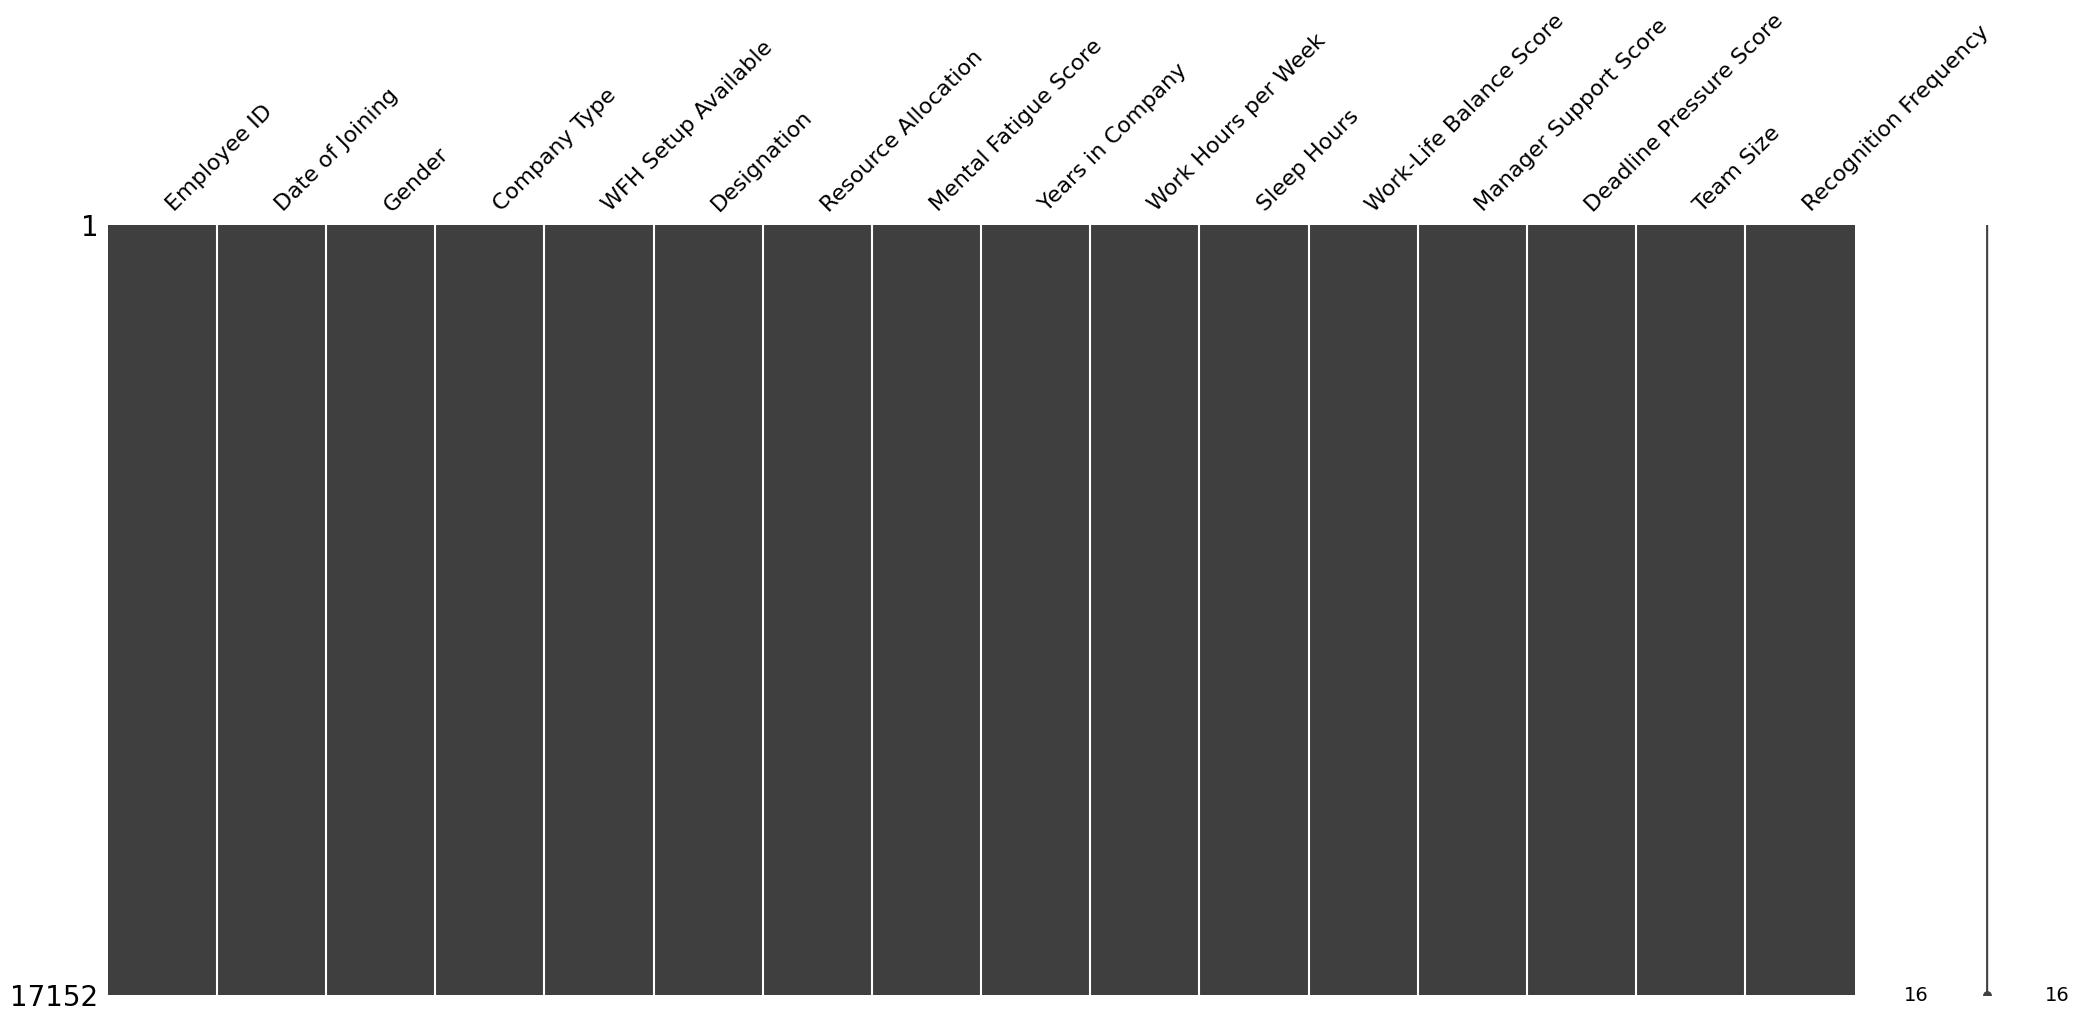

In [134]:
msno.matrix(train_df_imputar)

#### 3.2 Limpieza de datos: valores duplicados

In [176]:
print("Cantidad de datos duplicados:", train_df_imputar.duplicated().sum())

Cantidad de datos duplicados: 0


#### 3.3 Limpieza de datos: Análisis de outliers y variables numéricas

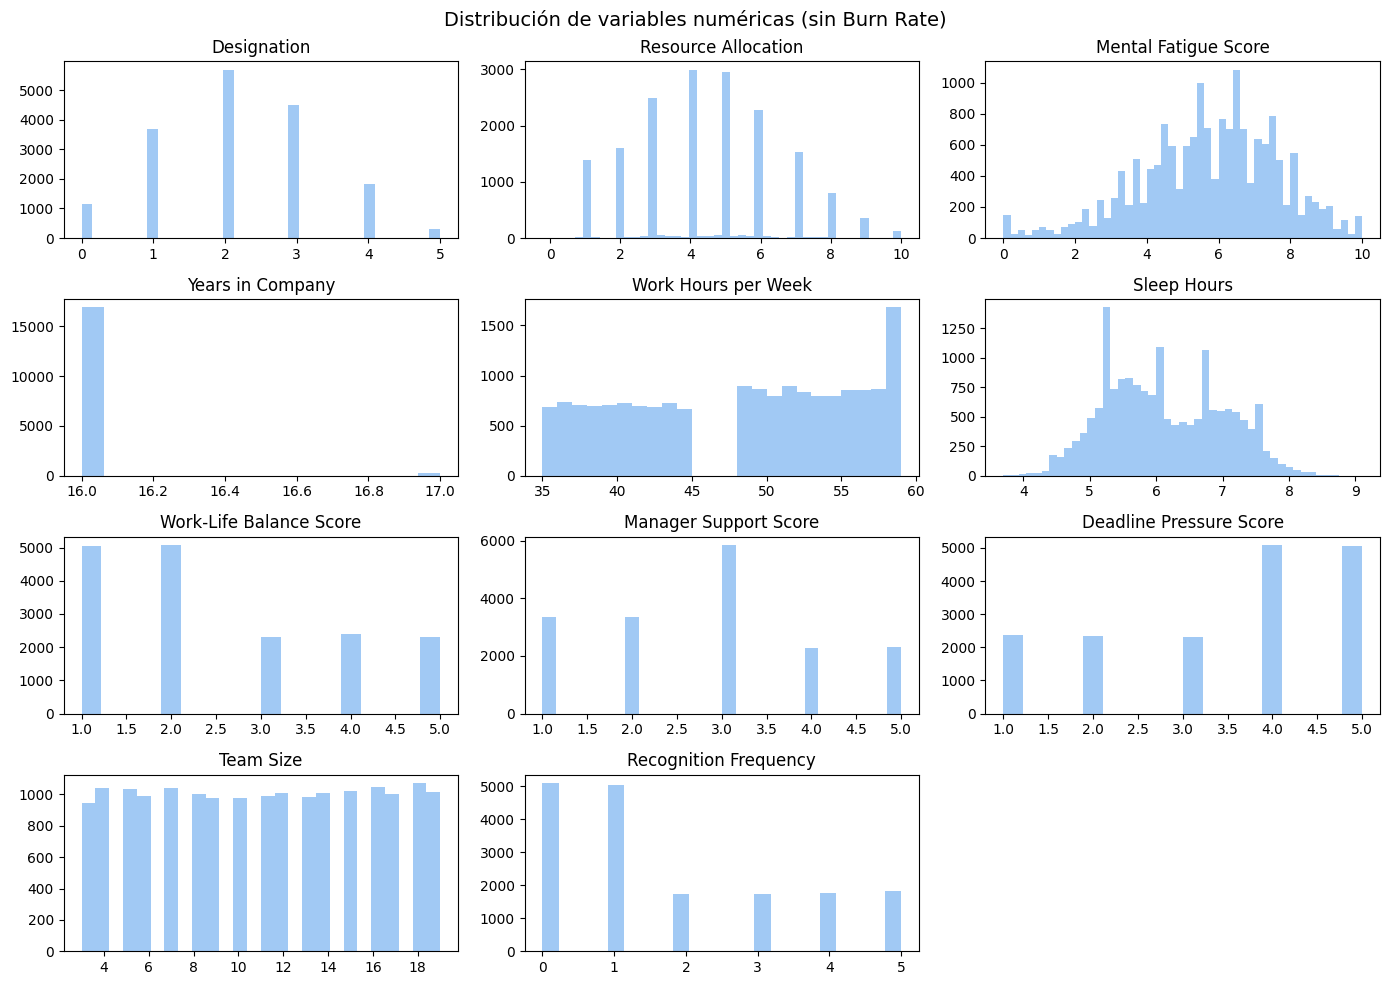

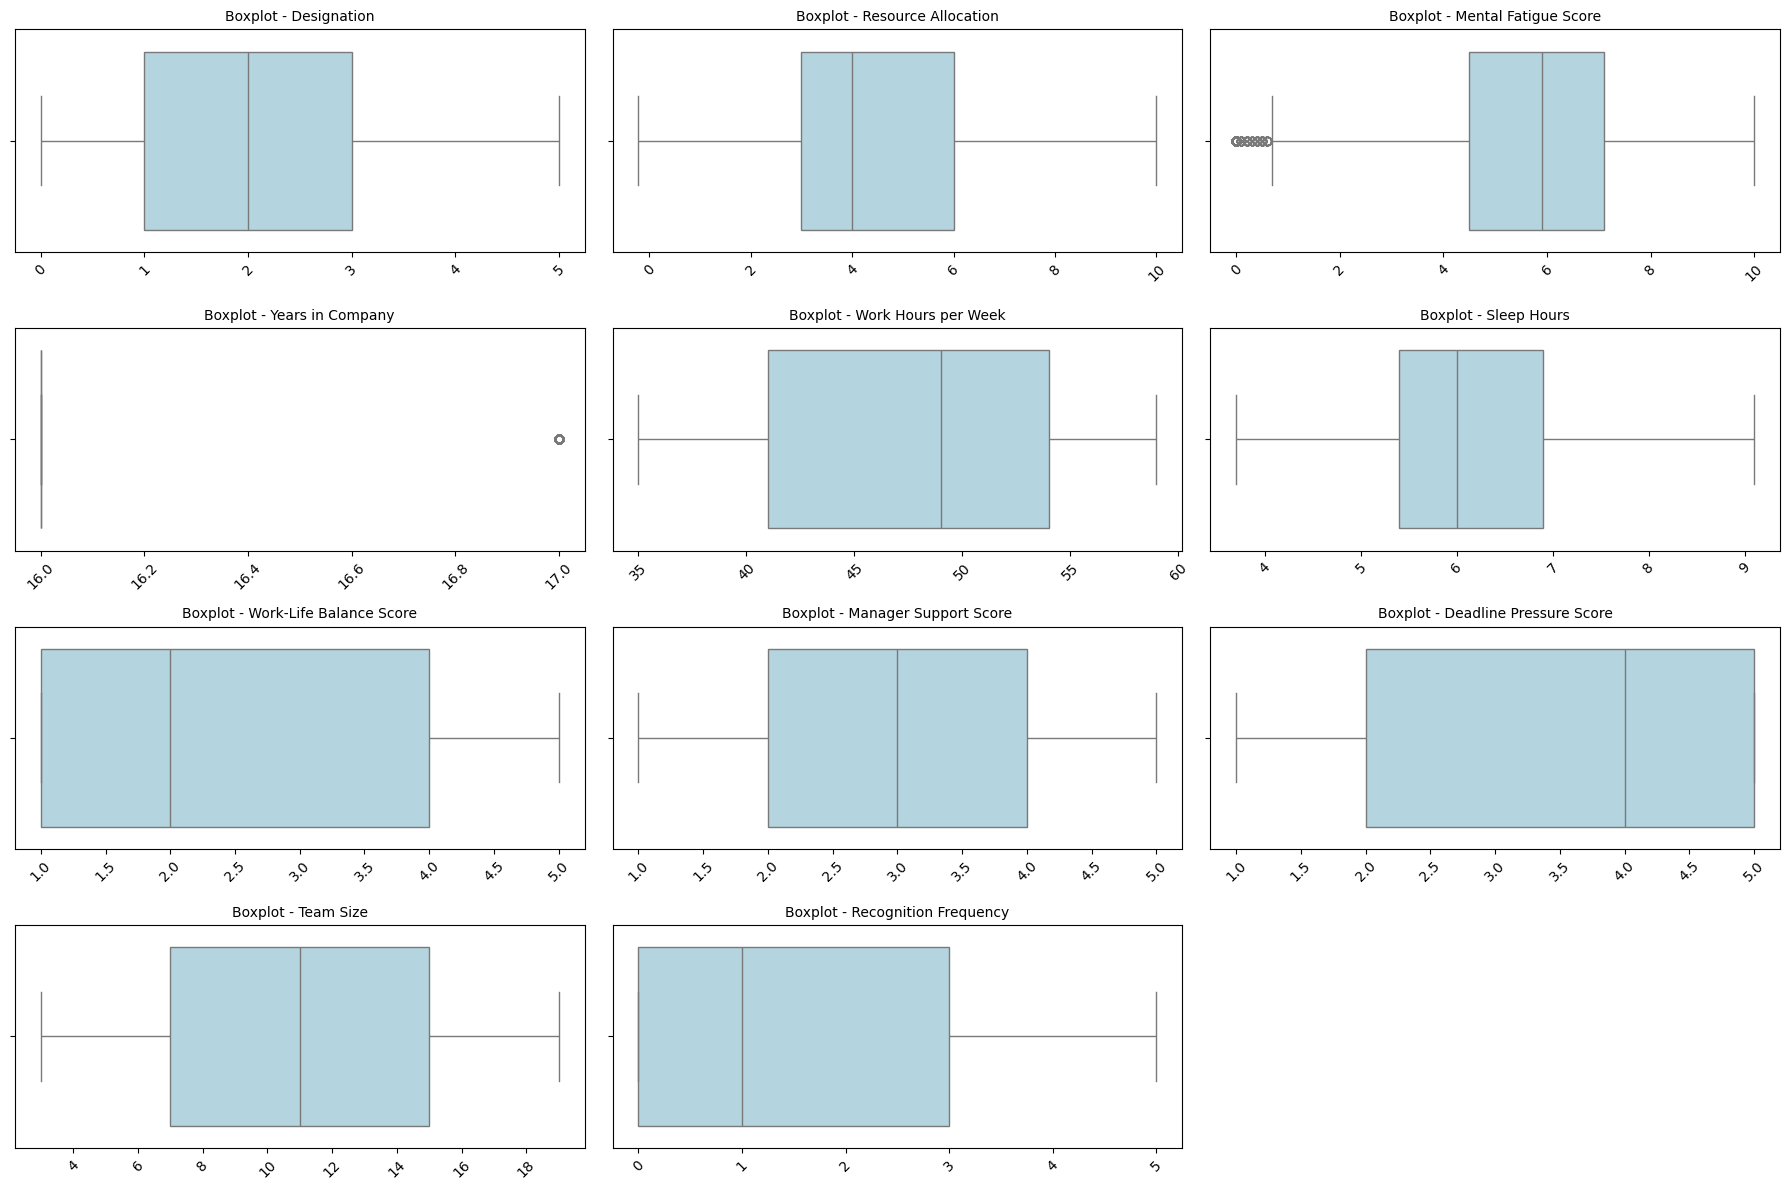

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 1. Seleccionar solo columnas numéricas
numeric_columns = train_df_imputar.select_dtypes(include='number').columns

# 2. Histograma por variable
train_df_imputar[numeric_columns].hist(bins='auto', figsize=(14, 10), grid=False)
plt.suptitle("Distribución de variables numéricas (sin Burn Rate)", fontsize=14)
plt.tight_layout()
plt.show()

# 3. Boxplots para detección visual de outliers
n_cols = 3
n_rows = math.ceil(len(numeric_columns) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 3))

axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(data=train_df_imputar, x=col, ax=axes[i], color='lightblue')
    axes[i].set_title(f'Boxplot - {col}', fontsize=10)
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='x', labelrotation=45)

# Ocultar subplots vacíos si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [178]:
print("Cantidad de valores < 1 en Mental Fatigue Score:",
      (train_df_imputar['Mental Fatigue Score'] < 1).sum())

Cantidad de valores < 1 en Mental Fatigue Score: 299


Que una persona tenga un nivel de mental fatigue debajo de 1 es inusual, por lo que se lo considera como un error de carga de datos, o simplemente personas que querian omitir esto en la encuesta, es por eso que se decide eliminar estas filas. Además el número total de outliers representa un porcentaje bajo, por lo que es seguro eliminarlos

In [179]:
# Antes de eliminar
print("Tamaño original:", train_df_imputar.shape)

# Filtrar registros con valores sospechosamente bajos
train_df_imputar = train_df_imputar[train_df_imputar['Mental Fatigue Score'] >= 1]

# Después de eliminar
print("Tamaño después de eliminar outliers:", train_df_imputar.shape)

Tamaño original: (17152, 16)
Tamaño después de eliminar outliers: (16853, 16)


### 3. Codificación de variables

#### 3.1 Eliminar columnas irrelevantes
Basándose en el análisis previo de los datos, se observa que la columna "Date of Joining" siempre indica el mismo año, 2008, mientras que "Years in Company" varía únicamente entre 16 y 17 años. Además, el 98,4 % de las filas en "Years in Company" corresponden a 16 años, lo que indica una baja variabilidad en estos registros. Por lo tanto, ambas columnas no aportan información significativa para el análisis y se consideran redundantes, por lo que se decide eliminarlas del conjunto de datos. 

Por otro lado, la columna "Employee ID" funciona únicamente como identificador de cada empleado y no proporciona datos relevantes para los análisis, por lo que también se opta por eliminarla.

In [180]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#  Eliminar columnas irrelevantes
df_train = train_df_imputar.drop(columns=['Employee ID', 'Date of Joining', 'Years in Company'])
df_test = test_df_imputar.drop(columns=['Employee ID', 'Date of Joining', 'Years in Company'])

#### 3.2 Codificar variable Objetivo o Target Burnout

Codificar la variable objetivo Burnout
Esto se hace para que el modelo clasifique categorias, y no un número. Es decir, que prediga si el burn rate es low, medium o high, que es mucho más gráfico y explicativo que si el modelo devolviese un número.

In [181]:
from sklearn.preprocessing import OrdinalEncoder
def clasificar_burn_rate(x):
    if x < 0.33:
        return "Low"
    elif x < 0.66:
        return "Medium"
    else:
        return "High"

y_train_class = y_train.apply(clasificar_burn_rate)
y_test_class  = y_test.apply(clasificar_burn_rate)

ordinal_encoder = OrdinalEncoder(categories=[["Low", "Medium", "High"]])
y_train_encoded = pd.Series(
    ordinal_encoder.fit_transform(y_train_class.to_frame()).ravel(),
    name="BurnRate_Class",
    index=y_train_class.index  # conserva el index original
)
y_test_encoded = pd.Series(
    ordinal_encoder.transform(y_test_class.to_frame()).ravel(),
    name="BurnRate_Class",
    index=y_test_class.index
)


#### 3.3 Codificar variables categóricas

Como los modelos numéricos no pueden trabajar directamente con variables categoricas como strings, como Male, 
Yes, No, etc. es necesario transformarlas en numéricas y que conserven la información de la categoria, sin introducir sesgos o relaciones incorrectas.
Porque One Hot Encoding? Porque las variables categóricas son nominales, es decir no tienen un orden lógico, y tienen baja cardinalidad (yes/no, Male/Female, Service/Product). Se crea una columna binaria por categoría. 
Se utiliza dropfirst para evitar la colinealidad, es decir, se codifica Gender, solo como Male o female, ya que la otra variable es implicita, y tienen una correlación total entre ellas.

In [182]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Definimos las columnas categóricas y numéricas
categorical_cols = ["Gender", "Company Type", "WFH Setup Available"]
numeric_cols = [col for col in df_train.columns if col not in categorical_cols]
X_train_num_df = df_train[numeric_cols].copy()
X_test_num_df  = df_test[numeric_cols].copy()

# Codificación One-Hot para categóricas 
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_ohe = ohe.fit_transform(df_train[categorical_cols])
X_test_ohe  = ohe.transform(df_test[categorical_cols])
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)

# Convertimos las variables codificadas a DataFrames
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=ohe_feature_names, index=df_train.index)
X_test_ohe_df  = pd.DataFrame(X_test_ohe,  columns=ohe_feature_names, index=df_test.index)

X_train_full = pd.concat([X_train_num_df, X_train_ohe_df], axis=1)
X_test_full  = pd.concat([X_test_num_df,  X_test_ohe_df],  axis=1)

In [183]:
X_train_full.head()

,Designation,Resource Allocation,Mental Fatigue Score,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency,Gender_Male,Company Type_Service,WFH Setup Available_Yes
2640,1.0,4.0,5.700000,52.0,5.5,1.0,2.0,4.0,10.0,0.0,1.0,0.0,1.0
19505,1.0,3.0,4.088623,41.0,6.9,5.0,3.0,1.0,5.0,2.0,1.0,1.0,0.0
14382,2.0,3.0,5.900000,50.0,5.7,1.0,1.0,4.0,15.0,1.0,1.0,1.0,1.0
18552,2.0,4.0,3.600000,36.0,7.9,3.0,3.0,3.0,4.0,5.0,1.0,0.0,1.0
17860,4.0,7.0,7.400000,52.0,6.2,2.0,2.0,4.0,4.0,0.0,0.0,1.0,1.0


#### 3.3 Normalización / estandarización

Obtener los máximos y mínimos permite verificar si hay variables con valores muy dispares en el dataset

In [184]:
# Obtener los máximos de cada variable
maximos = X_train_full.max()

# Obtener los mínimos de cada variable
minimos = X_train_full.min()

# Mostrar los resultados
print("Máximos de cada variable:\n", maximos)
print("\nMínimos de cada variable:\n", minimos)

Máximos de cada variable:
 Designation                 5.0
Resource Allocation        10.0
Mental Fatigue Score       10.0
Work Hours per Week        59.0
Sleep Hours                 9.1
Work-Life Balance Score     5.0
Manager Support Score       5.0
Deadline Pressure Score     5.0
Team Size                  19.0
Recognition Frequency       5.0
Gender_Male                 1.0
Company Type_Service        1.0
WFH Setup Available_Yes     1.0
dtype: float64

Mínimos de cada variable:
 Designation                 0.000000
Resource Allocation         0.242011
Mental Fatigue Score        1.000000
Work Hours per Week        35.000000
Sleep Hours                 3.700000
Work-Life Balance Score     1.000000
Manager Support Score       1.000000
Deadline Pressure Score     1.000000
Team Size                   3.000000
Recognition Frequency       0.000000
Gender_Male                 0.000000
Company Type_Service        0.000000
WFH Setup Available_Yes     0.000000
dtype: float64


Se observa que algunas variables como resource allocation, work hours peer week, mental fatigue score, team size, y sleep hours presentan una gran amplitud entre sus valores mínimos y máximos, y se encuentran en diferentes escalas. Esta disparidad en las unidades de medida puede afectar negativamente el desempeño de ciertos algoritmos de machine learning, especialmente aquellos sensibles a la escala de los datos

In [185]:
from sklearn.preprocessing import MinMaxScaler
# aplicar el Escalado Min-Max a las variables numéricas
variables = [
    'Resource Allocation', 'Mental Fatigue Score', 'Work Hours per Week',
    'Sleep Hours', 'Team Size'
]

X_train_scaled = X_train_full.copy()
X_test_scaled  = X_test_full.copy()

# 3. Creamos el escalador
scaler = MinMaxScaler()

# 4. Ajustamos sobre el train y transformamos train y test
X_train_scaled[variables] = scaler.fit_transform(X_train_scaled[variables])
X_test_scaled[variables]  = scaler.transform(X_test_scaled[variables])

### 4. Análisis de correlación entre variables

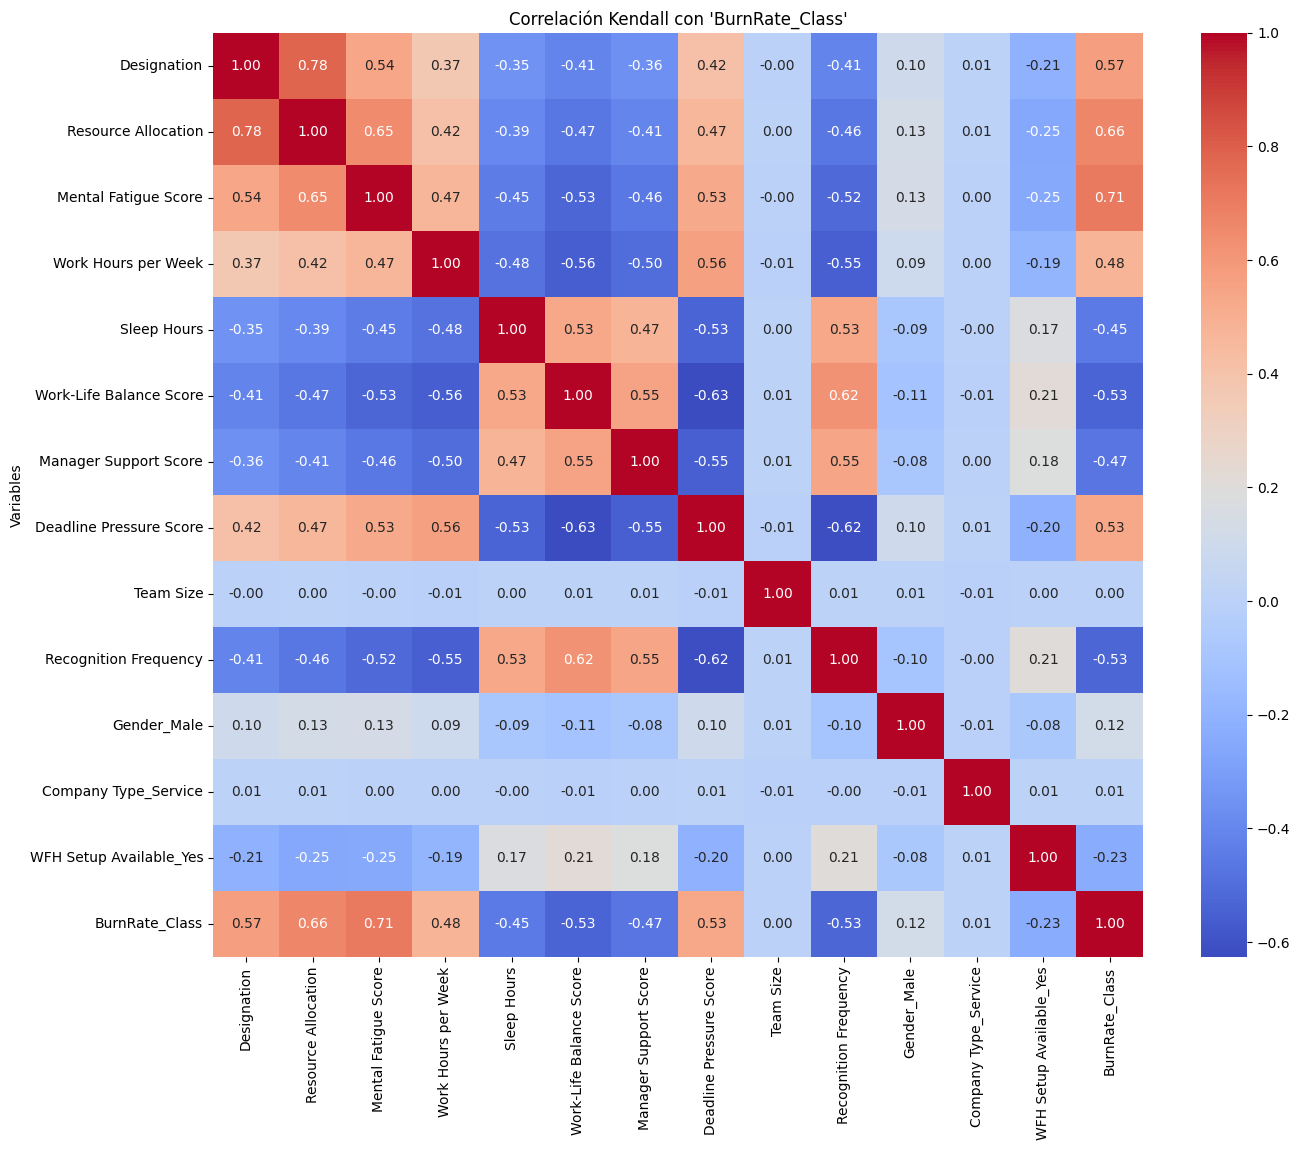

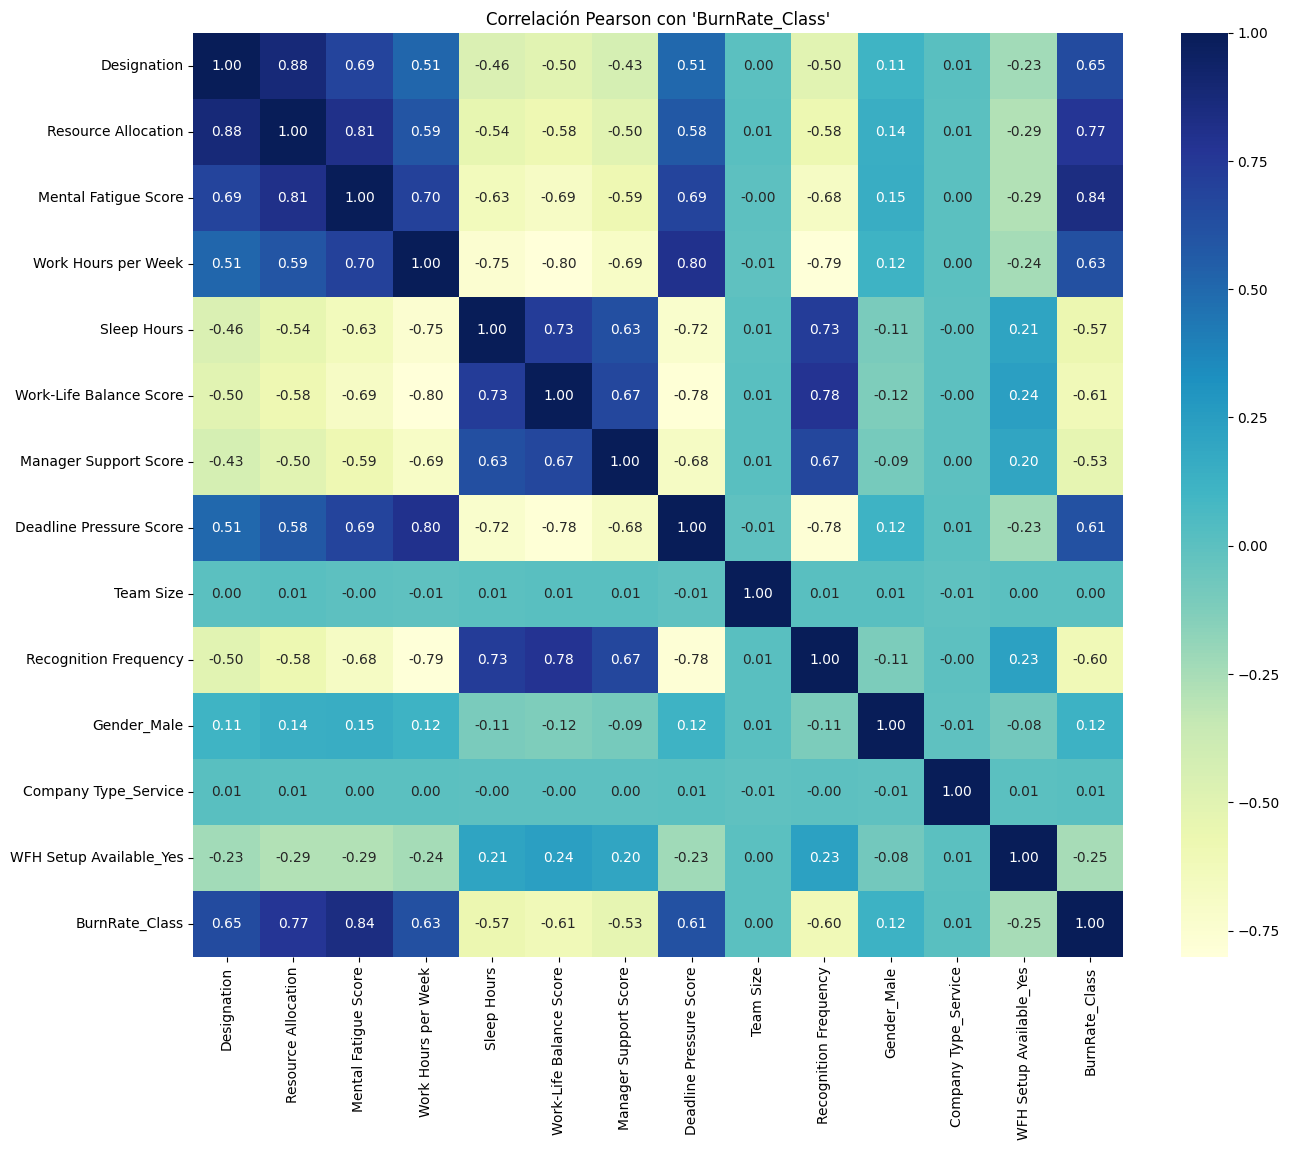

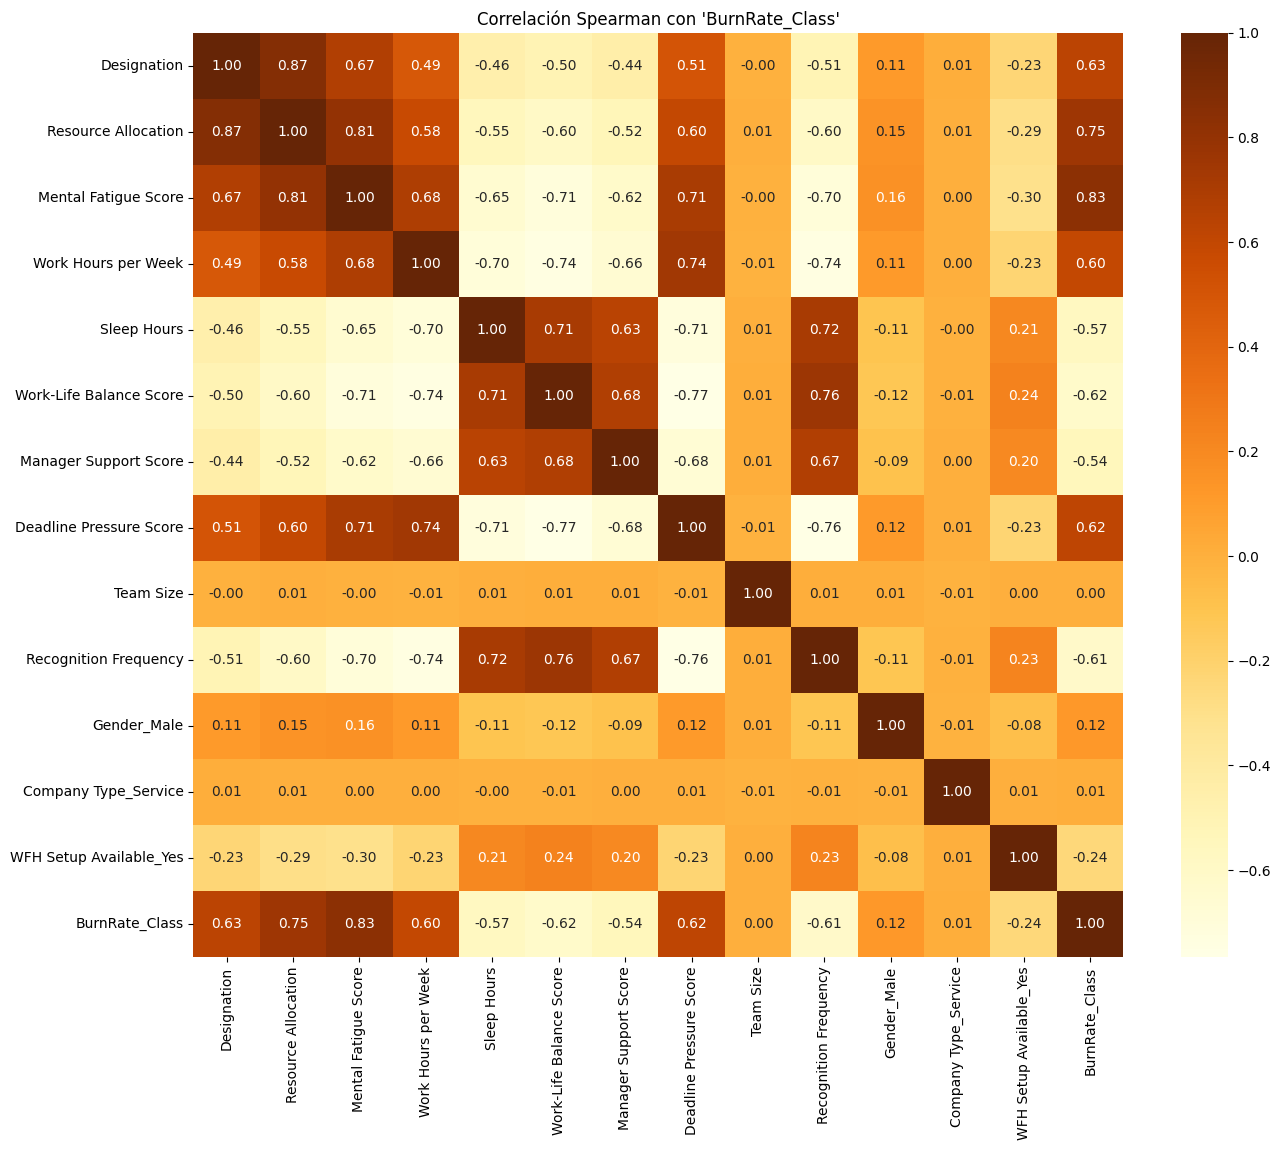

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear nuevo DataFrame con las variables escaladas + clase del target
X_corr_df = X_train_scaled.copy()
X_corr_df["BurnRate_Class"] = y_train_encoded  # Ya tiene el índice alineado

# ===============================
# Correlación Kendall
# ===============================
plt.figure(figsize=(15, 12))
sns.heatmap(X_corr_df.corr(method='kendall'), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlación Kendall con 'BurnRate_Class'")
plt.ylabel('Variables')
plt.show()

# ===============================
# Correlación Pearson
# ===============================
plt.figure(figsize=(15, 12))
sns.heatmap(X_corr_df.corr(method='pearson'), annot=True, fmt=".2f", cmap='YlGnBu')
plt.title("Correlación Pearson con 'BurnRate_Class'")
plt.show()

# ===============================
# Correlación Spearman
# ===============================
plt.figure(figsize=(15, 12))
sns.heatmap(X_corr_df.corr(method='spearman'), annot=True, fmt=".2f", cmap='YlOrBr')
plt.title("Correlación Spearman con 'BurnRate_Class'")
plt.show()


En la matriz de correlación se observan varios patrones relevantes sobre cómo se relacionan las variables con el nivel de agotamiento laboral (Burn Rate) y entre sí:

**Burn Rate tiene alta correlación positiva con:**

- Mental Fatigue Score 
- Resource Allocation 
- Designation 
- Work Hours per Week 
- Deadline Pressure Score 

Estas variables están fuertemente asociadas con un mayor agotamiento.

**Burn Rate tiene correlación negativa con:**

- Sleep Hours 
- Work-Life Balance Score 
- Manager Support Score 
- Recognition Frequency 

Es decir, más sueño, mejor balance, mayor apoyo y más reconocimiento tienden a reducir el burnout.

*Team Size es la única variable que no muestra correlación significativa con otras variables, por lo que tambien podría ser una variable a eliminar a futuro al momento de modelar alguna solución*